In [1]:
import librosa
import librosa.display
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle(list(signals.keys())[0], size=16)
    plt.plot(list(signals.values())[0])


In [16]:
# Use the envelop to clean data
def envelop(y, rate, threshold):
    mask=[]
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean> threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [31]:
def convert_single_audio_to_image(audio_path, image_path):
    data, sr = librosa.load(audio_path, sr = 44100,duration =0.5)
    #data = data.astype('float64')
    
    signal = {"raw":data}
    plot_signals(signal)
    
    datac = 10*np.log10(data)
    signal = {"decibels":datac}
    #plot_signals(signal)
    
    data2 = librosa.core.amplitude_to_db(data, ref= np.max)
    signal = {"librosadb":data2}
    #plot_signals(signal)
    
#     print(data.shape)
#     refined = librosa.effects.split(y=data,top_db= 0.1)
#     refined = data[refined[0][0]:refined[0][1]]
#     signal = {"refine":refined}
#     plot_signals(signal)
    
    mask = envelop(data, sr, 0.01)
    data = data[mask]
    signal = {"Envelop":data}
    plot_signals(signal)

count of Wav_files in 1= sample


C:\Users\Tasli\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Tasli\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


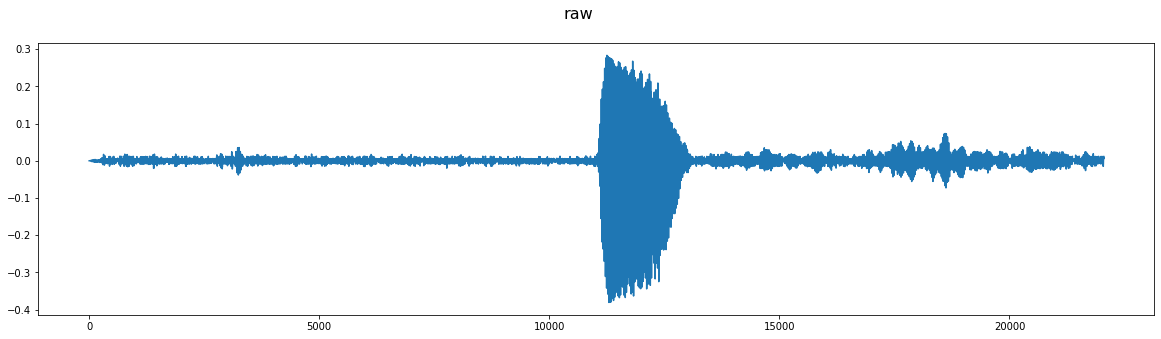

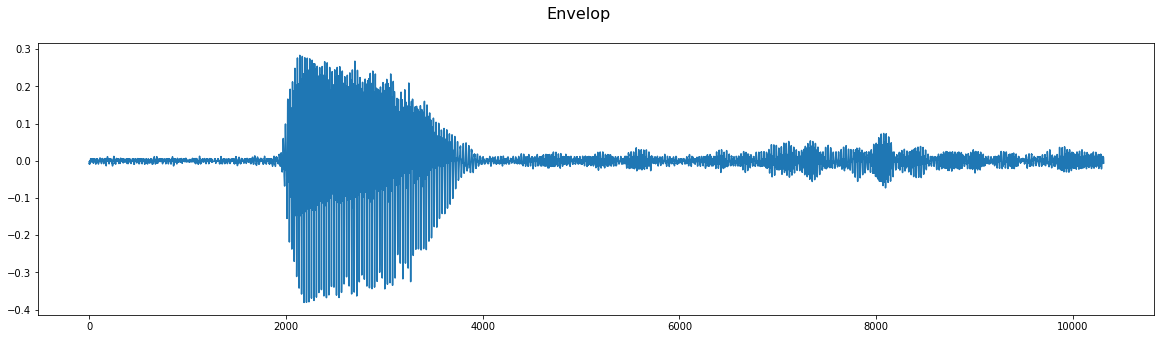

In [32]:
#valid_species = ['Asellia tridens', 'Eptesicus bottae', 'Myotis emarginatus', 'Pipistrellus kuhli', 'Rhinopoma muscatellum', 'Rhyneptesicus nasutus', 'Rousettus aegyptius', 'Taphozous perforatus']
valid_species = ['sample']


audio_folder_name= r"data\Identified calls"
image_folder_name=  r"data\SpectrogramRefined"
for sp in valid_species:
    curr_file_names = listdir(join(audio_folder_name,sp))
    print("count of Wav_files in {}= {}".format(len(curr_file_names),sp))
    for f in curr_file_names:
        if f.endswith('.WAV') or f.endswith('.wav'):
            audio_path = join(audio_folder_name,sp,f)
            all_caps_file_name = f.upper()
            image_path = join(image_folder_name,all_caps_file_name.replace('.WAV', '.png'))
            convert_single_audio_to_image(audio_path,image_path)
        break
